In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [48]:
df = pd.read_csv("Mall_Customers.csv")

In [49]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [50]:
data = df.iloc[:,3:5].values

In [51]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

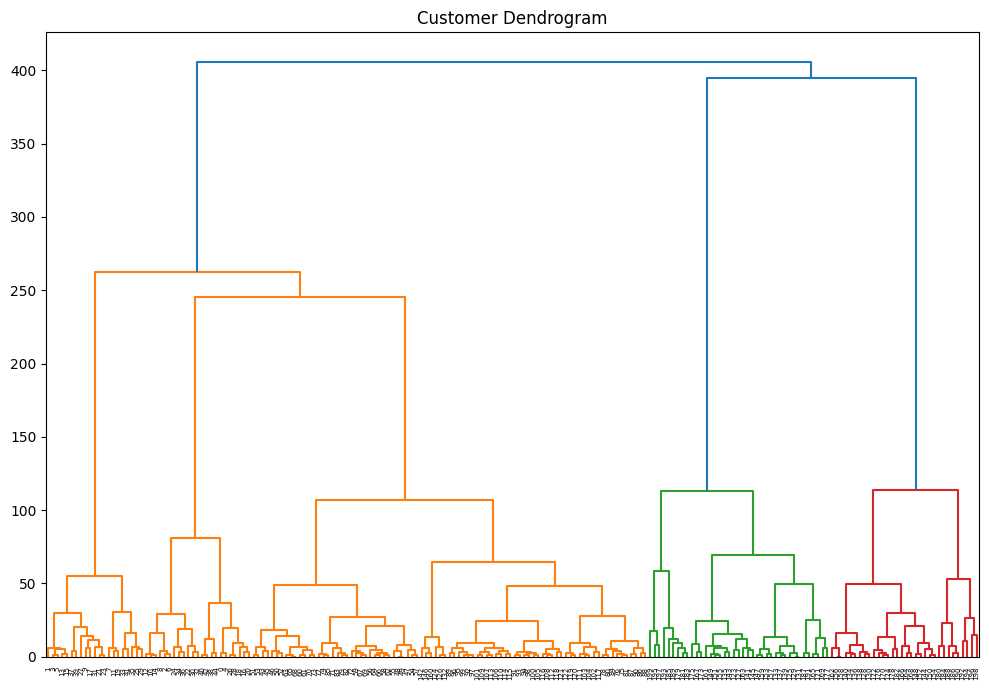

In [52]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(data,method="ward"))
plt.tight_layout()
plt.show()

In [53]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = cluster.fit_predict(data)

In [54]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

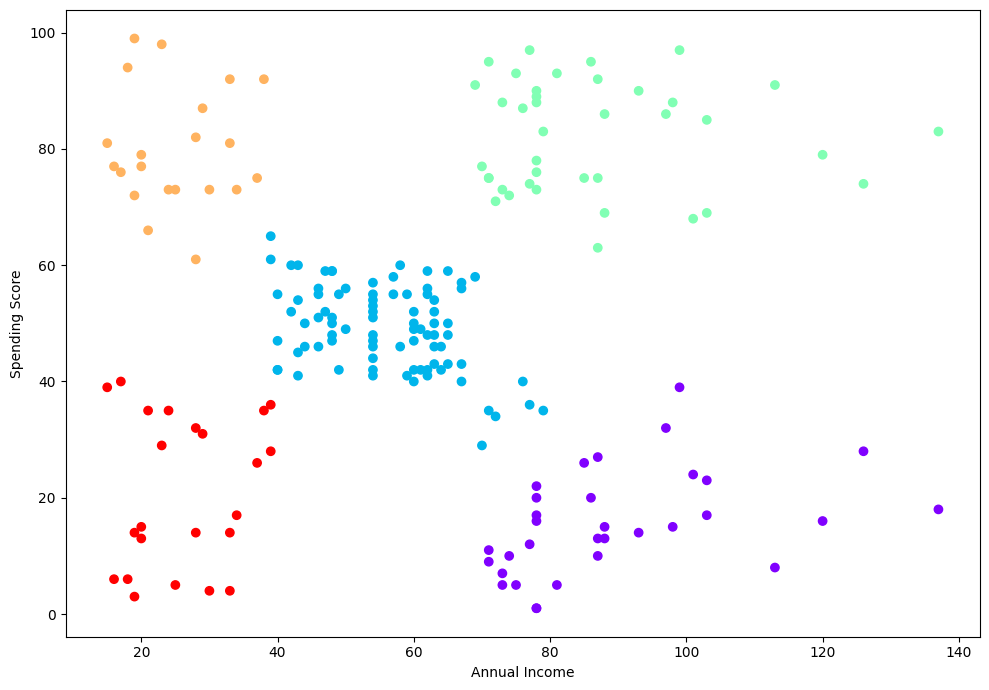

In [55]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.tight_layout()
plt.show()

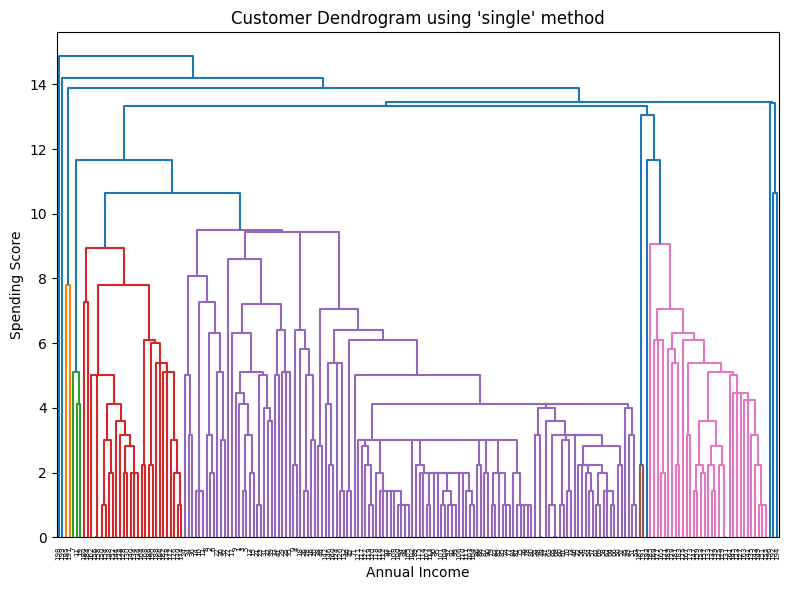

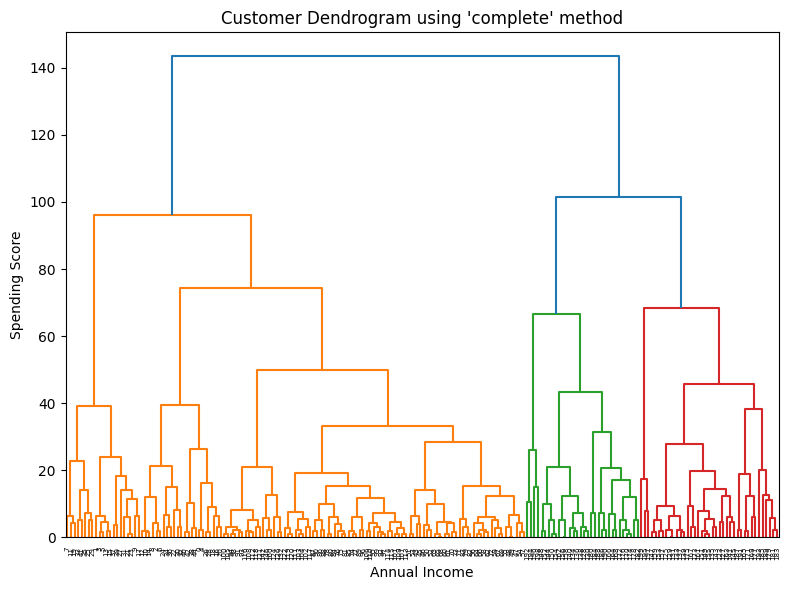

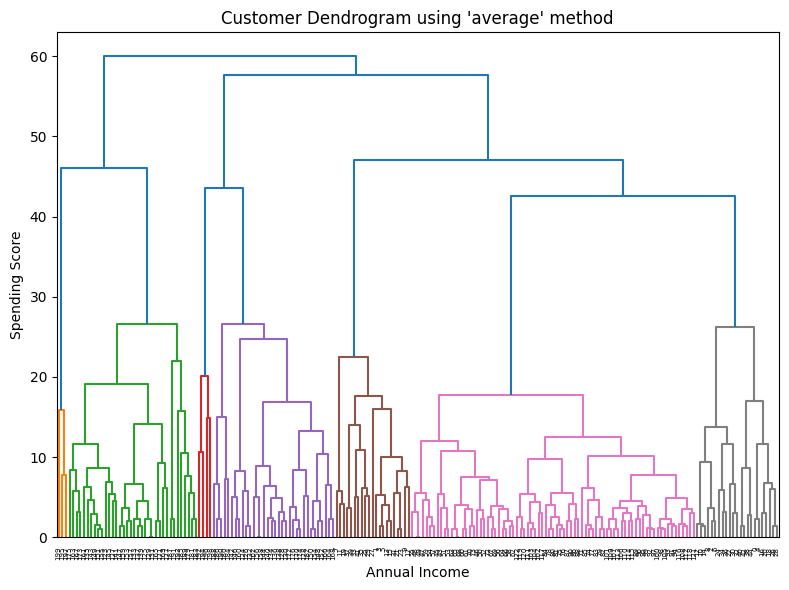

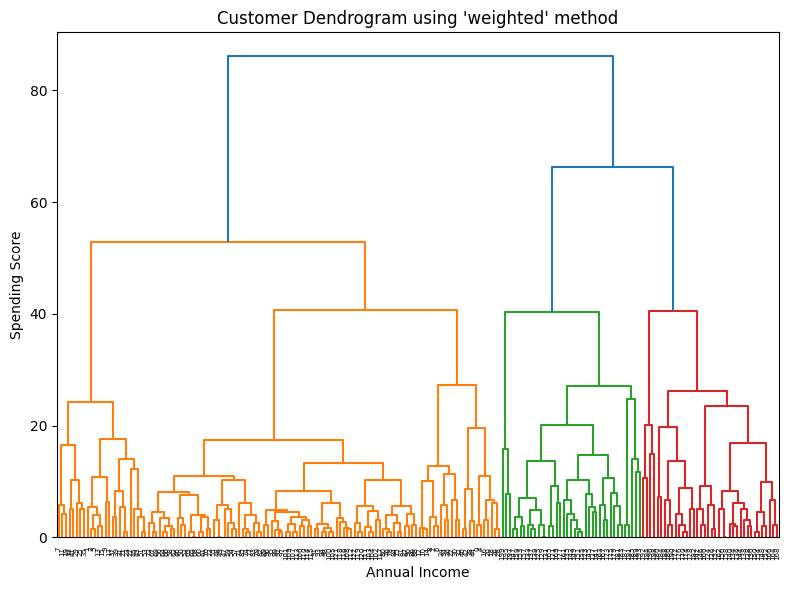

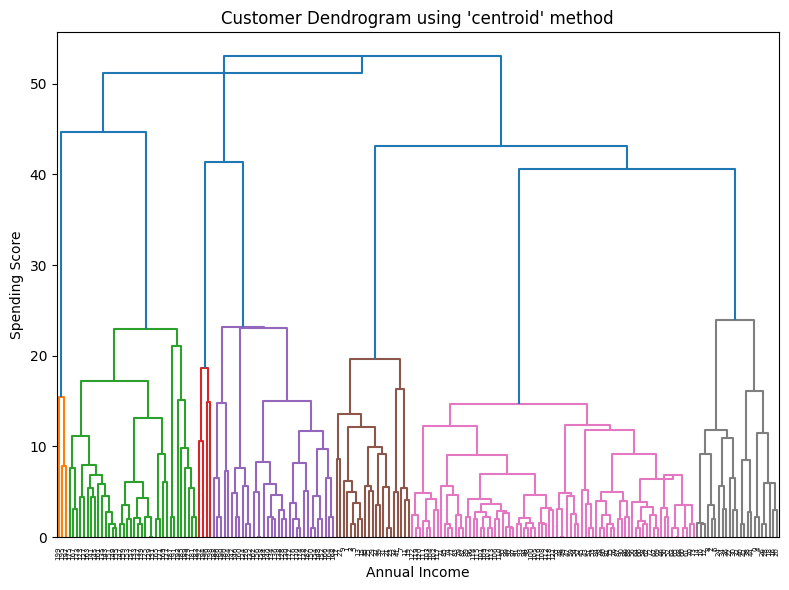

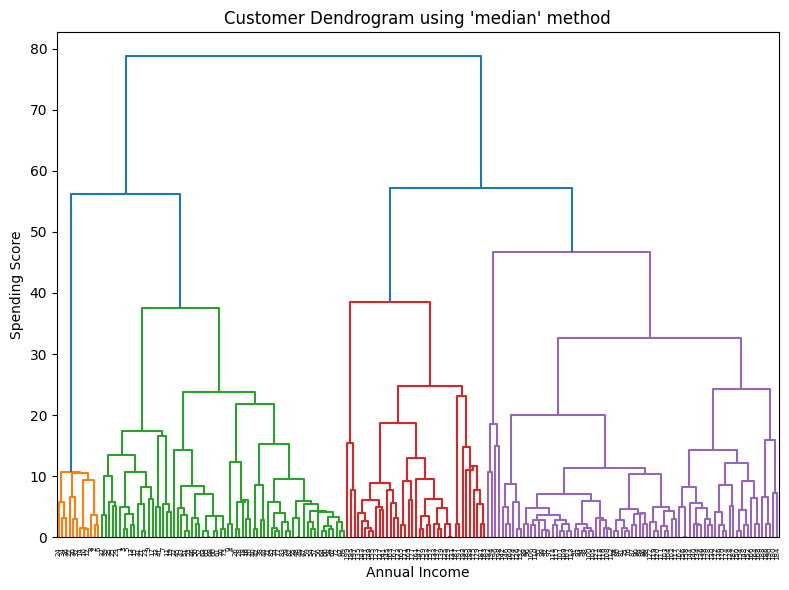

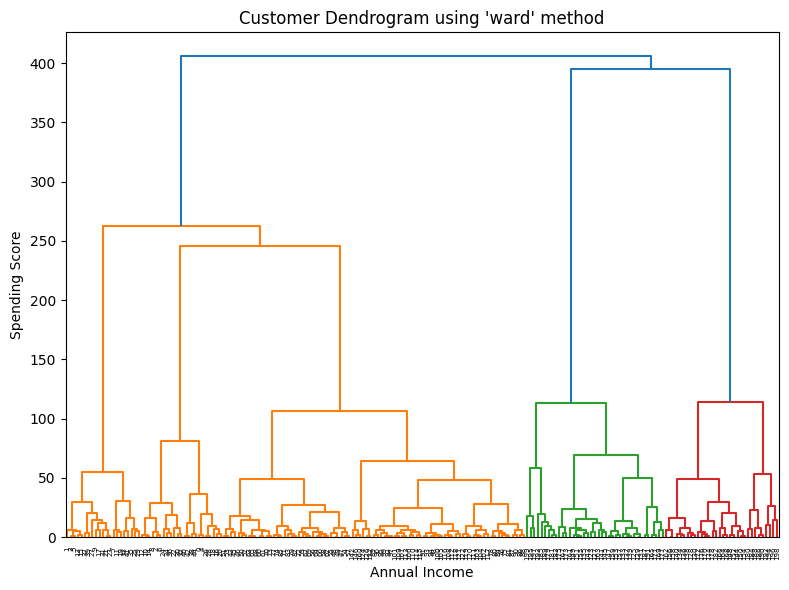

In [56]:
methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

for method in methods:
    plt.figure(figsize=(8,6))
    plt.title(f"Customer Dendrogram using '{method}' method")
    dend = shc.dendrogram(shc.linkage(data,method=method))
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.tight_layout()
    plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [58]:
data_scaled = scaler.fit_transform(data)

In [59]:
np.std(data_scaled), np.mean(data_scaled)

(np.float64(1.0), np.float64(-1.7985612998927537e-16))

In [60]:
cluster_scale = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_scale = cluster_scale.fit_predict(data)

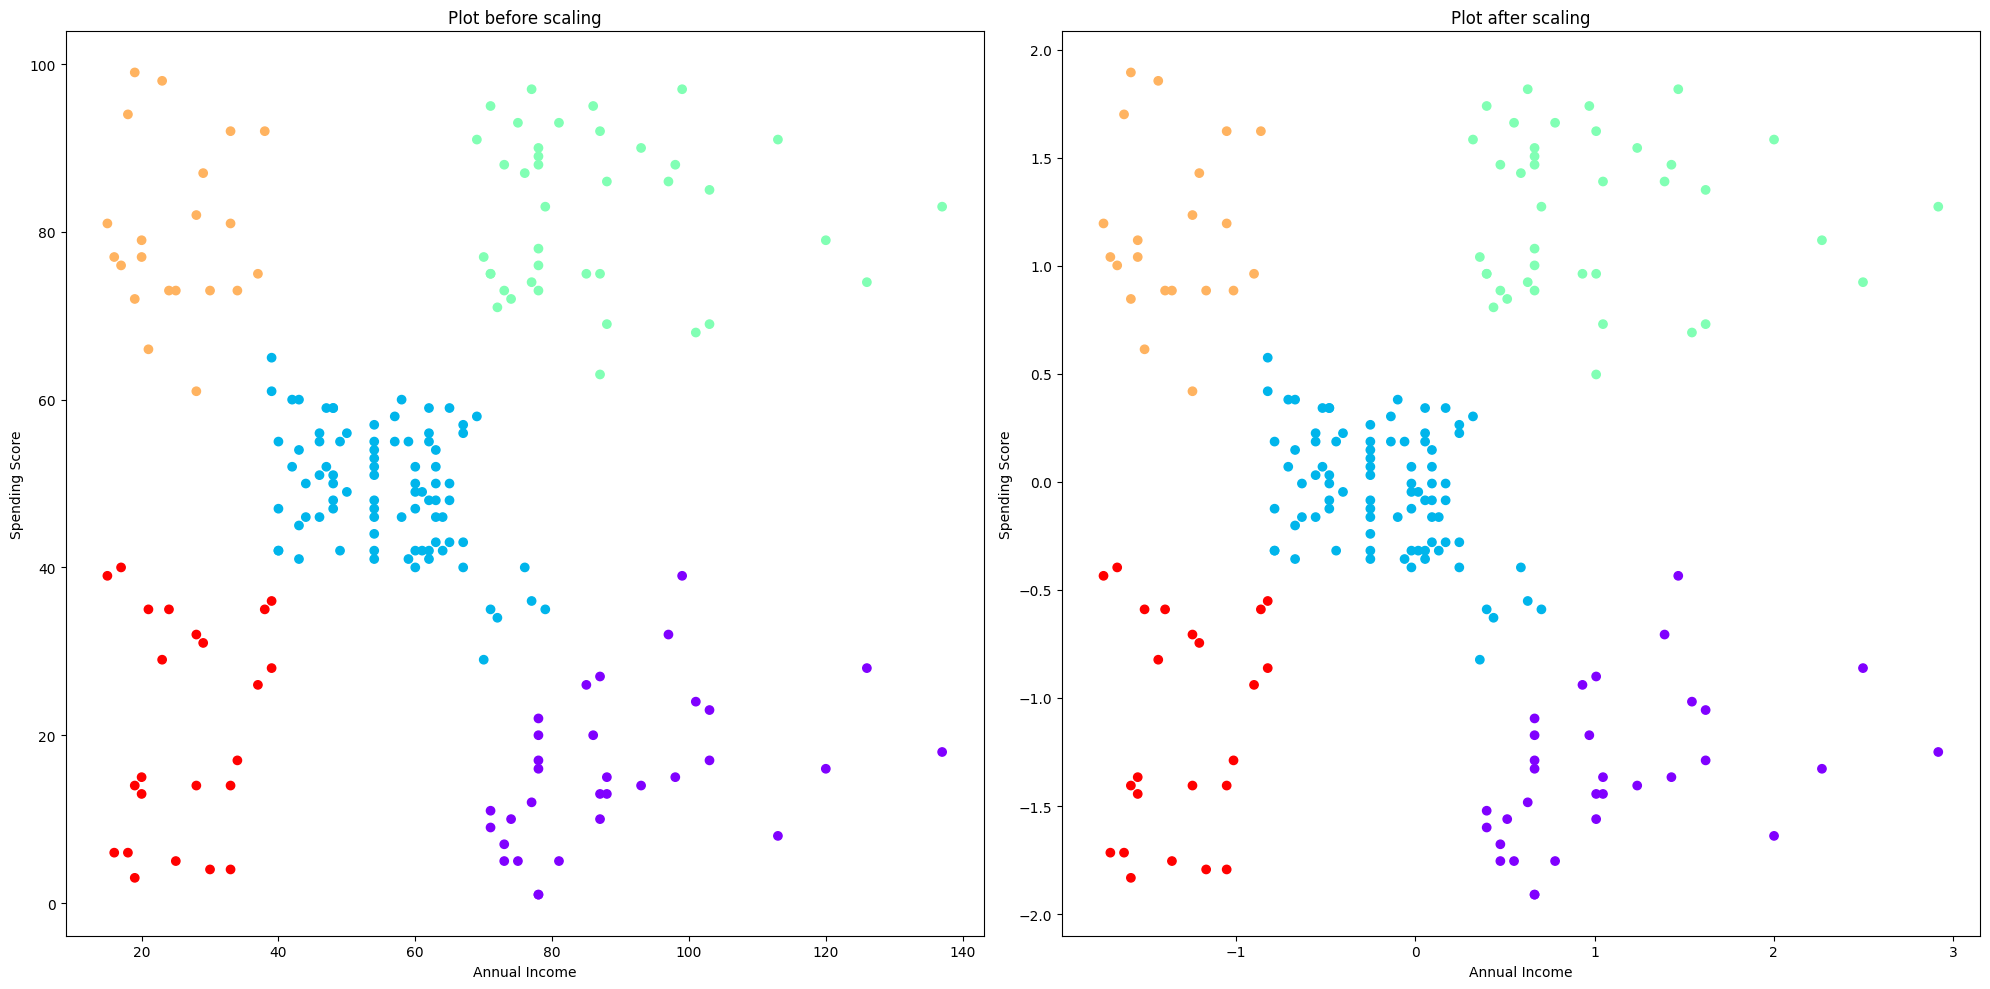

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

axes[0].scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')
axes[0].set_title("Plot before scaling")
axes[0].set_xlabel("Annual Income")
axes[0].set_ylabel("Spending Score")

axes[1].scatter(data_scaled[:,0], data_scaled[:,1], c=cluster_scale.labels_, cmap='rainbow')
axes[1].set_title("Plot after scaling")
axes[1].set_xlabel("Annual Income")
axes[1].set_ylabel("Spending Score")

plt.tight_layout()
plt.show()